# Gradient of Image

## import library

In [177]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

## load input image ('test.jpeg')

In [178]:
I0 = img.imread('test.jpeg')

## check the size of the input image

In [179]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
num_row     = I0.shape[0]
num_column  = I0.shape[1]
num_channel = I0.shape[2]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)


number of rows of I0 =  510
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image
- take the average of the input image with 3 channels with respect to the channels into an image with 1 channel

In [180]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = 1/3 * (I0[:,:,0]+I0[:,:,1]+I0[:,:,2])
    
    
num_row     = I.shape[0]
num_column  = I.shape[1]

# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

number of rows of I =  510
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [181]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = (I-I.min())/(I.max()-I.min())

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [182]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    D = np.roll(I,-1,axis=0)
    D[-1,:] = D[-2,:]
    D = D-I
    
    return D


- backward difference : $ I[x, y] - I[x-1, y] $ 

In [183]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    D = np.roll(I,1,axis=0)
    D[0,:] = D[1,:]
    D = D-I
    
    return D


- central difference : $ \frac{1}{2} \left( I[x+1, y] - I[x-1, y] \right)$ 

In [184]:
def compute_derivative_x_central(I):

    D = np.zeros(I.shape)
    C = np.zeros(I.shape)

    D = np.roll(I,1,axis=0)
    C = np.roll(I,-1,axis=0)
    C[-1,:] = C[-2,:]
    D[0,:] = D[1,:]
    D = 1/2*(C-D)
    
    return D

## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [185]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    D = np.roll(I,-1,axis=1)
    D[:,-1] = D[:,-2]
    D = D-I
    
    return D


- backward difference : $ I[x, y] - I[x, y-1] $ 

In [186]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    D = np.roll(I,1,axis=1)
    D[:,0] = D[:,1]
    D = D-I
    
    return D


- central difference : $ \frac{1}{2} \left( I[x, y+1] - I[x, y-1] \right)$ 

In [187]:
def compute_derivative_y_central(I):
    
    D = np.zeros(I.shape)
    C = np.zeros(I.shape)

    D = np.roll(I,1,axis=1)
    C = np.roll(I,-1,axis=1)
    C[:,-1] = C[:,-2]
    D[:,0] = D[:,1]
    D = 1/2*(C-D)
    
    return D

## compute the norm of the gradient of the input image 

- $L_2^2$-norm of the gradient $ \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $ is defined by $ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 $

In [188]:
def compute_norm_gradient_central(I):
    
    central_x = compute_derivative_x_central(I)
    central_y = compute_derivative_y_central(I)
    norm_gradient = np.zeros(I.shape)
    
    norm_gradient = (central_x**2) + (central_y**2)
    
    return norm_gradient


___

___

## functions for presenting the results

___

___

In [189]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [190]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [191]:
def function_result_03():

    D = compute_derivative_x_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [192]:
def function_result_04():

    D = compute_derivative_x_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [193]:
def function_result_05():

    D = compute_derivative_x_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [194]:
def function_result_06():

    D = compute_derivative_y_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [195]:
def function_result_07():

    D = compute_derivative_y_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [196]:
def function_result_08():

    D = compute_derivative_y_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [197]:
def function_result_09():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [198]:
def function_result_10():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    im = plt.imshow(D, cmap=cm.jet, norm=colors.LogNorm())
    plt.colorbar(im)
    plt.show()

In [199]:
def function_result_11():

    D = compute_derivative_x_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [200]:
def function_result_12():

    D = compute_derivative_x_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [201]:
def function_result_13():

    D = compute_derivative_x_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [202]:
def function_result_14():

    D = compute_derivative_y_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [203]:
def function_result_15():

    D = compute_derivative_y_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [204]:
def function_result_16():

    D = compute_derivative_y_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [205]:
def function_result_17():

    D = compute_norm_gradient_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


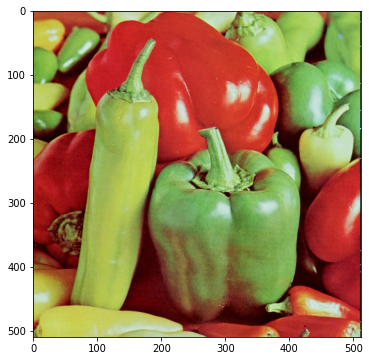

**************************************************
## [RESULT 02]
**************************************************


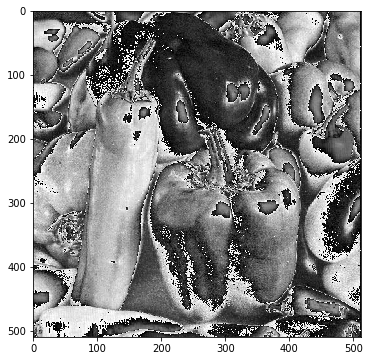

**************************************************
## [RESULT 03]
**************************************************


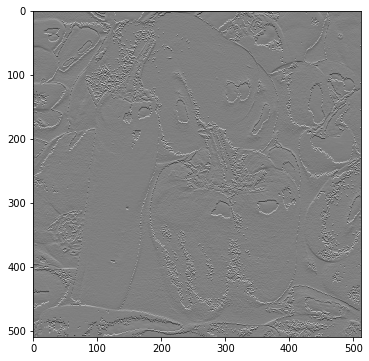

**************************************************
## [RESULT 04]
**************************************************


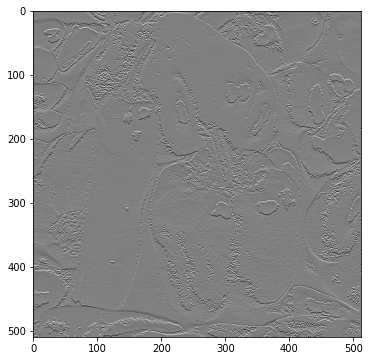

**************************************************
## [RESULT 05]
**************************************************


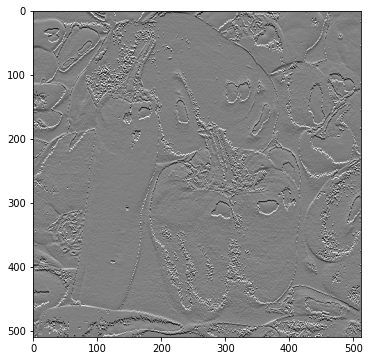

**************************************************
## [RESULT 06]
**************************************************


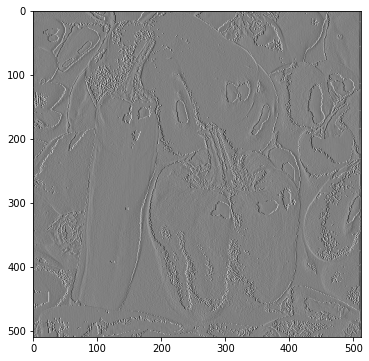

**************************************************
## [RESULT 07]
**************************************************


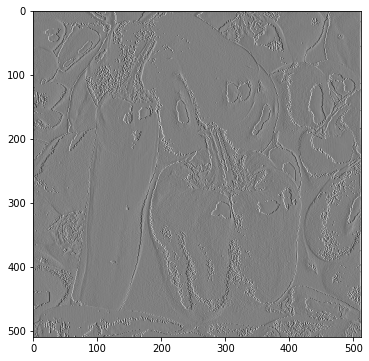

**************************************************
## [RESULT 08]
**************************************************


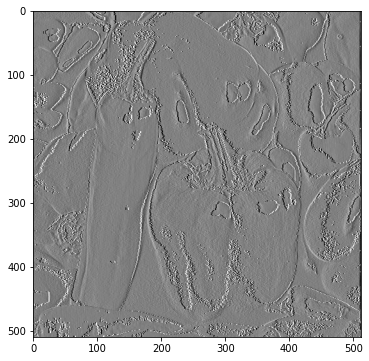

**************************************************
## [RESULT 09]
**************************************************


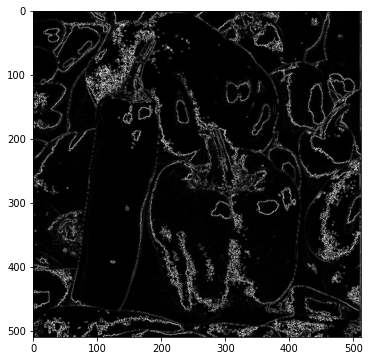

**************************************************
## [RESULT 10]
**************************************************


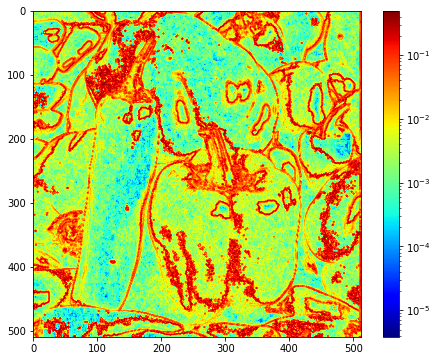

**************************************************
## [RESULT 11]
**************************************************
value1 =  -0.023529411764705854
value2 =  0.0
value3 =  -0.01568627450980392
value4 =  0.03529411764705881
**************************************************
## [RESULT 12]
**************************************************
value1 =  0.0
value2 =  -0.00784313725490196
value3 =  0.9568627450980391
value4 =  0.039215686274509665
**************************************************
## [RESULT 13]
**************************************************
value1 =  -0.011764705882352927
value2 =  0.00392156862745098
value3 =  -0.4862745098039215
value4 =  -0.0019607843137254277
**************************************************
## [RESULT 14]
**************************************************
value1 =  -0.10588235294117646
value2 =  0.0
value3 =  0.9529411764705883
value4 =  0.0
**************************************************
## [RESULT 15]
*****************************************

In [206]:
number_result = 17

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)